<a href="https://colab.research.google.com/github/hadine30/crowd-counting/blob/master/dencityCSRnetVISDRONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
! git clone https://github.com/Tikam02/CrowdEstimation

Cloning into 'CrowdEstimation'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 175 (delta 0), reused 0 (delta 0), pack-reused 168
Receiving objects: 100% (175/175), 47.01 MiB | 34.46 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [0]:
import sys
sys.path.append('/content/CrowdEstimation/CSRNet/CSRnet-pytorch')

In [4]:
!unzip "/content/drive/My Drive/VisDrone2020-CC.zip" -d "/content/"

Archive:  /content/drive/My Drive/VisDrone2020-CC.zip
   creating: /content/VisDrone2020-CC/
   creating: /content/VisDrone2020-CC/annotations/
  inflating: /content/VisDrone2020-CC/annotations/00001.txt  
  inflating: /content/VisDrone2020-CC/annotations/00002.txt  
  inflating: /content/VisDrone2020-CC/annotations/00003.txt  
  inflating: /content/VisDrone2020-CC/annotations/00004.txt  
  inflating: /content/VisDrone2020-CC/annotations/00005.txt  
  inflating: /content/VisDrone2020-CC/annotations/00006.txt  
  inflating: /content/VisDrone2020-CC/annotations/00007.txt  
  inflating: /content/VisDrone2020-CC/annotations/00008.txt  
  inflating: /content/VisDrone2020-CC/annotations/00009.txt  
  inflating: /content/VisDrone2020-CC/annotations/00010.txt  
  inflating: /content/VisDrone2020-CC/annotations/00012.txt  
  inflating: /content/VisDrone2020-CC/annotations/00013.txt  
  inflating: /content/VisDrone2020-CC/annotations/00014.txt  
  inflating: /content/VisDrone2020-CC/annotations/

In [0]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import scipy.spatial
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [6]:
import os
# define the name of the directory to be created
path = "/content/train"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
try:
    os.mkdir(path+"/annotations")
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
try:
    os.mkdir(path+"/sequences")
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory /content/train 
Successfully created the directory /content/train 
Successfully created the directory /content/train 


In [7]:
#test set
path = "/content/test"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
try:
    os.mkdir(path+"/annotations")
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
try:
    os.mkdir(path+"/sequences")
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory /content/test 
Successfully created the directory /content/test 
Successfully created the directory /content/test 


In [0]:
root = "VisDrone2020-CC/"
f = open(root+"trainlist.txt", "r")
l = []
for line in f:
    # Split on any whitespace (including tab characters)
    row = line.split()
    row= ''.join(row)
    l.append(row)
f.close()

In [0]:
root = "VisDrone2020-CC/"
f = open(root+"testlist.txt", "r")
lt = []
for line in f:
    # Split on any whitespace (including tab characters)
    row = line.split()
    row= ''.join(row)
    lt.append(row)
f.close()

In [10]:
import shutil
pat = "/content/"
root = "/content/VisDrone2020-CC"
for path, dirs, files in os.walk(root+"/sequences"):
  for f in dirs:
    rootanno = "VisDrone2020-CC/annotations/"+f+".txt"
    if f in l:
      #si l'annotation existe
      print("train",f)
      if(os.path.exists(rootanno)):
          shutil.copytree(root+"/sequences/"+f , pat+"train/sequences/"+f)
          shutil.copyfile(rootanno, pat+"train/annotations/"+f+".txt")
      else:
          shutil.copytree(root+"/sequences/"+f, pat+"val/sequences/"+f)
    elif f in lt:
      print("test",f)
      shutil.copytree(root+"/sequences/"+f, pat+"test/sequences/"+f)
      if(os.path.exists(rootanno)):
        shutil.copyfile(rootanno, pat+"test/annotations/"+f+".txt")

train 00093
train 00085
test 00070
test 00103
train 00058
train 00109
test 00112
train 00077
train 00050
train 00026
train 00049
test 00108
train 00091
train 00083
train 00005
train 00003
test 00105
train 00030
train 00010
train 00102
train 00068
train 00001
train 00029
test 00018
train 00092
test 00062
train 00028
train 00039
train 00055
train 00084
train 00040
train 00100
test 00043
train 00080
train 00007
train 00071
test 00035
train 00047
train 00031
test 00044
train 00076
test 00101
test 00015
train 00057
train 00012
train 00079
test 00088
test 00065
train 00032
train 00033
train 00098
train 00094
train 00096
train 00097
test 00024
train 00060
test 00023
test 00016
train 00048
train 00019
train 00054
train 00002
train 00110
train 00107
train 00064
test 00061
train 00072
train 00067
train 00087
train 00073
train 00090
train 00081
train 00004
train 00021
test 00034
train 00059
train 00052
test 00075
train 00006
train 00027
test 00063
train 00020
train 00099
train 00014
test 00069
tr

In [0]:
root = '/content/'

In [0]:
import os
#now generate the ShanghaiA's ground truth
train = os.path.join(root,'train/sequences')
test = os.path.join(root,'test/sequences')
path_sets = [train,test]

In [13]:
img_folder_paths = []
for path in path_sets:
  for path, dirs, files in os.walk(path):
    for d in dirs:
      img_folder_paths.append(d)
    break
print(len(img_folder_paths))

112


In [14]:
img_folder_paths=[]
for path, dirs, files in os.walk(path_sets[0]):
    for d in dirs:
      img_folder_paths.append(path_sets[0]+"/"+d)
print(len(img_folder_paths))

82


In [0]:
import matplotlib.pyplot as plt

In [16]:
for img_folder_path in img_folder_paths:
    print (img_folder_path)

/content/train/sequences/00093
/content/train/sequences/00085
/content/train/sequences/00058
/content/train/sequences/00109
/content/train/sequences/00077
/content/train/sequences/00050
/content/train/sequences/00026
/content/train/sequences/00049
/content/train/sequences/00091
/content/train/sequences/00083
/content/train/sequences/00005
/content/train/sequences/00003
/content/train/sequences/00030
/content/train/sequences/00010
/content/train/sequences/00102
/content/train/sequences/00068
/content/train/sequences/00001
/content/train/sequences/00029
/content/train/sequences/00092
/content/train/sequences/00028
/content/train/sequences/00039
/content/train/sequences/00055
/content/train/sequences/00084
/content/train/sequences/00040
/content/train/sequences/00100
/content/train/sequences/00080
/content/train/sequences/00007
/content/train/sequences/00071
/content/train/sequences/00047
/content/train/sequences/00031
/content/train/sequences/00076
/content/train/sequences/00057
/content

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
from scipy import spatial
import json
from matplotlib import cm as CM
from image import *
#from model import CSRNet
import torch
%matplotlib inline

In [0]:
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    print(pts)
    leafsize = 2048
    # build kdtree
    tree = spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [0]:
import time

In [21]:
for img_folder_path in img_folder_paths:
  print(img_folder_path)
  for path, dirs, files in os.walk(img_folder_path):
    for img_path in files:
      #img= cv2.imread(img_folder_path+"/"+img_path)
      img = plt.imread(img_folder_path+"/"+img_path)
      print(img_path)
      k = np.zeros((img.shape[0],img.shape[1]))
      annotation = img_path.replace('.jpg','')
      pos = 0
      #nombre de l'image
      for nbr in annotation:
        if nbr != '0':
          annotation = annotation[pos:]
          break
        pos+=1
      file_annota = open(img_folder_path.replace('sequences','annotations')+".txt", "r")
      print(img_folder_path.replace('sequences','annotations')+".txt")
      lines = file_annota.readlines()
      file_annota.close()
      for ligne in lines:
        line = ligne.strip()
        line = line.split(",")
        line = list(map(int, line))
        if line[0] == int(annotation):
          k[line[2], line[1]] = 1
      #print(k)
      start_time = time.time()
      k = gaussian_filter_density(k)
      print("Temps d execution : %s secondes ---" % (time.time() - start_time))
      with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k
      break
  break

/content/train/sequences/00093
00014.jpg
/content/train/annotations/00093.txt
(1080, 1920)
[[1427   22]
 [ 687   32]
 [1403   72]
 [1449  157]
 [1832  191]
 [1432  202]
 [ 462  220]
 [1377  222]
 [1825  233]
 [1399  247]
 [1840  249]
 [1869  254]
 [1882  261]
 [1831  263]
 [1415  275]
 [1477  298]
 [1361  300]
 [1685  331]
 [ 188  441]
 [ 333  477]
 [ 328  498]
 [ 230  508]
 [ 456  512]
 [ 160  520]
 [ 253  528]
 [ 464  528]
 [1299  541]
 [ 560  555]
 [ 251  561]
 [ 100  565]
 [ 133  572]
 [ 244  574]
 [ 477  575]
 [  98  577]
 [1186  590]
 [ 183  608]
 [1153  610]
 [1172  618]
 [1179  628]
 [ 807  629]
 [1204  639]
 [1121  645]
 [1146  648]
 [1165  652]
 [1723  656]
 [1709  660]
 [ 702  664]
 [ 840  665]
 [1220  669]
 [ 843  681]
 [1063  681]
 [1725  682]
 [1575  692]
 [ 930  698]
 [1144  701]
 [1053  702]
 [1065  712]
 [1143  735]
 [1167  744]
 [ 993  776]
 [1695  781]
 [1647  784]
 [1722  790]
 [ 921  820]
 [1031  854]
 [1070  868]
 [ 968  874]
 [1015  889]
 [1002  897]
 [ 960 1009]

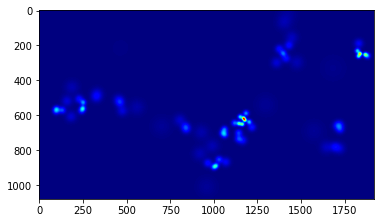

In [22]:
gt_file = h5py.File(files[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [23]:
np.sum(groundtruth)

70.39125

In [24]:
import json
path = {u"answer": [42.2], u"abs": 42}
print(json.dumps(path))

{"answer": [42.2], "abs": 42}


In [0]:
import torch.nn as nn
import torch
from torchvision import models
from utils import save_net,load_net

In [0]:
class CSRNet(nn.Module):
    def __init__(self, load_weights=False):
        super(CSRNet, self).__init__()
        self.frontend_feat = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512]
        self.backend_feat  = [512, 512, 512,256,128,64]
        self.frontend = make_layers(self.frontend_feat)
        self.backend = make_layers(self.backend_feat,in_channels = 512,dilation = True)
        self.output_layer = nn.Conv2d(64, 1, kernel_size=1)
        if not load_weights:
            mod = models.vgg16(pretrained = True)
            self._initialize_weights()
            for i in range(len(list(self.frontend.state_dict().items()))):
                list(self.frontend.state_dict().items())[i][1].data[:] = list(mod.state_dict().items())[i][1].data[:]
    def forward(self,x):
        x = self.frontend(x)
        x = self.backend(x)
        x = self.output_layer(x)
        return x
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.normal_(m.weight, 0.01)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [0]:
def make_layers(cfg, in_channels = 3,batch_norm=False,dilation = False):
    if dilation:
        d_rate = 2
    else:
        d_rate = 1
    layers = []
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=d_rate,dilation = d_rate)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)

In [0]:
model = CSRNet()

In [0]:
x = torch.rand((1,3,255,255))

In [41]:
model(x).shape

torch.Size([1, 1, 31, 31])